In [61]:
!pip install folium
import folium
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Get data 

In [46]:
# set low_memory becuase there are mix type in column duration and longtitude
# df = pd.read_csv('scrubbed.csv',low_memory=False)
# df.head(3)

In [47]:
# set low_memory becuase there are mix type in column duration and longtitude
df = pd.read_csv('scrubbed.csv',low_memory=False)
# clean up the unknown entries
df = df.replace('unknown', np.NaN)
# drop
df = df.drop('duration (hours/min)',axis= 1)
df = df.drop('date posted',axis=1)

# rename: make the name shorter and easier to call later
df = df.rename(columns = {'duration (seconds)':'duration'})
df = df.rename(columns = {'latitude':'lat'})

# get ride of the space in our header
df = df.rename(columns = {'longitude ':'long'})

# convert to numerical number, fix mix type issue
#df['lat']=pd.to_numeric(df['lat'])
df['duration'] = df.duration.str.extract('(\d+)', expand=True).astype(int)
df['lat'] = df.lat.str.extract('(\d+\.\d+)', expand=True).astype(float)

#deal with the time 
df['datetime'] = df['datetime'].replace('24:00','00:00',regex=True)

# convert the date time value
df['datetime']= pd.to_datetime(df['datetime'],format='%m/%d/%Y %H:%M')


# extract hour from datetime value
hours=df['datetime'].dt.hour
df['datetime_hour'] = hours
df['datetime_year'] = df['datetime'].dt.year
df['datetime_month'] = df['datetime'].dt.month
df['datetime_day'] = df['datetime'].dt.day


df


,datetime,city,state,country,shape,duration,comments,lat,long,datetime_hour,datetime_year,datetime_month,datetime_day
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.883056,-97.941111,20,1949,10,10
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082,21,1949,10,10
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667,17,1955,10,10
3,1956-10-10 21:00:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.978333,-96.645833,21,1956,10,10
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,20,1960,10,10
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,19,1961,10,10
6,1965-10-10 21:00:00,penarth (uk/wales),NaN,gb,circle,180,penarth uk circle 3mins stayed 30ft above m...,51.434722,-3.180000,21,1965,10,10
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,A bright orange color changing to reddish colo...,41.117500,-73.408333,23,1965,10,10
8,1966-10-10 20:00:00,pell city,al,us,disk,180,Strobe Lighted disk shape object observed clos...,33.586111,-86.286111,20,1966,10,10
9,1966-10-10 21:00:00,live oak,fl,us,disk,120,Saucer zaps energy from powerline as my pregna...,30.294722,-82.984167,21,1966,10,10


### Exploratory and visualization

 ##### Mean, median and sd for viewing duration

In [48]:
# Average duration in second
print("average duration in seconds:",df["duration"].mean())

average duration in seconds: 9016.88764129


In [49]:
print("median duration in seconds:",df["duration"].median())

median duration in seconds: 180.0


In [50]:
print("standard deviation in seconds:",df["duration"].std())

standard deviation in seconds: 620216.790311


####  Duration of the UFO varies a lot and the meadian is far of the mean so it is right skewed.  Is the duration related to the year and the other factors? Lets look at the correlation graph 

##### The general plot doest show us that much. Lets plot a graph based on the average of each year.


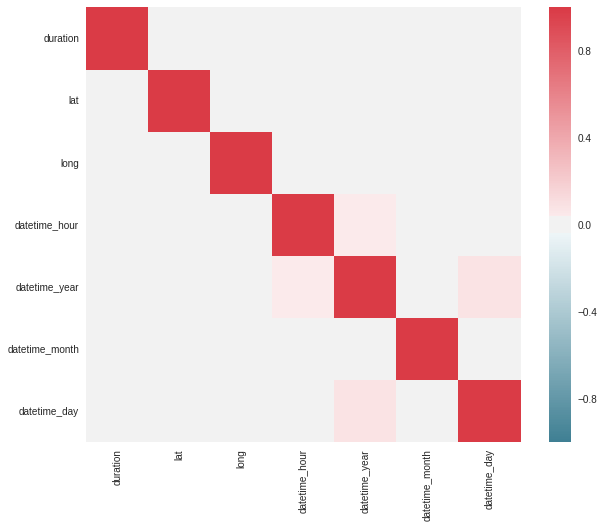

In [51]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [52]:
df_dummies = pd.get_dummies(df['shape'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df, df_dummies], axis=1)
del df_new['shape']
del df_new['city']
del df_new['comments']
df_new


,datetime,state,country,duration,lat,long,datetime_hour,datetime_year,datetime_month,datetime_day,...,formation,hexagon,light,other,oval,pyramid,rectangle,round,sphere,teardrop
0,1949-10-10 20:30:00,tx,us,2700,29.883056,-97.941111,20,1949,10,10,...,0,0,0,0,0,0,0,0,0,0
1,1949-10-10 21:00:00,tx,NaN,7200,29.384210,-98.581082,21,1949,10,10,...,0,0,1,0,0,0,0,0,0,0
2,1955-10-10 17:00:00,NaN,gb,20,53.200000,-2.916667,17,1955,10,10,...,0,0,0,0,0,0,0,0,0,0
3,1956-10-10 21:00:00,tx,us,20,28.978333,-96.645833,21,1956,10,10,...,0,0,0,0,0,0,0,0,0,0
4,1960-10-10 20:00:00,hi,us,900,21.418056,-157.803611,20,1960,10,10,...,0,0,1,0,0,0,0,0,0,0
5,1961-10-10 19:00:00,tn,us,300,36.595000,-82.188889,19,1961,10,10,...,0,0,0,0,0,0,0,0,1,0
6,1965-10-10 21:00:00,NaN,gb,180,51.434722,-3.180000,21,1965,10,10,...,0,0,0,0,0,0,0,0,0,0
7,1965-10-10 23:45:00,ct,us,1200,41.117500,-73.408333,23,1965,10,10,...,0,0,0,0,0,0,0,0,0,0
8,1966-10-10 20:00:00,al,us,180,33.586111,-86.286111,20,1966,10,10,...,0,0,0,0,0,0,0,0,0,0
9,1966-10-10 21:00:00,fl,us,120,30.294722,-82.984167,21,1966,10,10,...,0,0,0,0,0,0,0,0,0,0


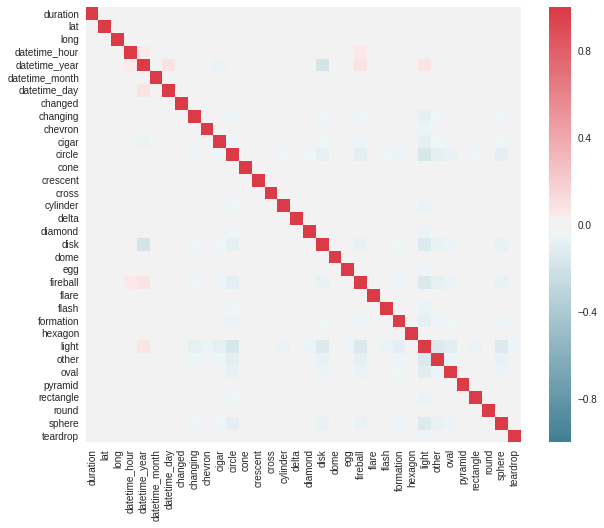

In [53]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df_new.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

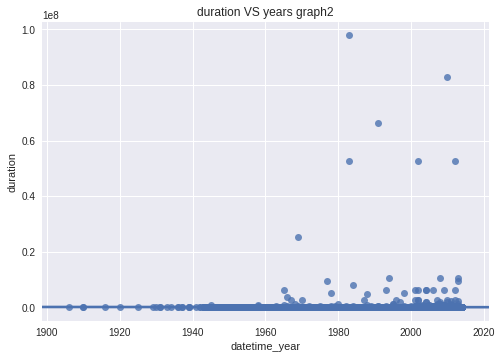

In [59]:
import seaborn as sns
sns.regplot(df['datetime_year'], df['duration'])
plt.title('duration VS years graph2')
plt.show()

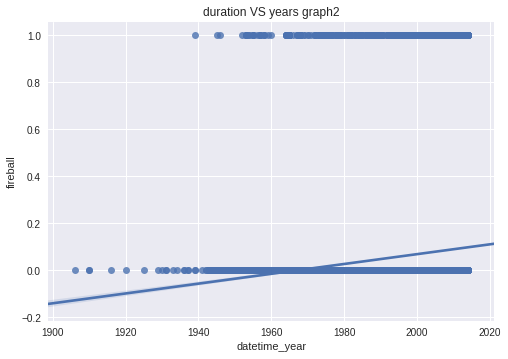

In [60]:
sns.regplot(df_new['datetime_year'], df_new['fireball'])
plt.title('duration VS years graph2')
plt.show()

In [74]:
df.groupby(['col1','col2']).size()

,datetime,city,state,country,shape,duration,comments,lat,long,datetime_hour,datetime_month,datetime_day
datetime_year,,,,,,,,,,,,
1906,1,1,0,0,1,1,1,1,1,1,1,1
1910,2,2,2,2,2,2,2,2,2,2,2,2
1916,1,1,0,0,1,1,1,1,1,1,1,1
1920,1,1,1,1,0,1,1,1,1,1,1,1
1925,1,1,1,1,1,1,1,1,1,1,1,1
1929,1,1,1,1,1,1,1,1,1,1,1,1
1930,1,1,1,0,1,1,1,1,1,1,1,1
1931,2,2,2,2,2,2,2,2,2,2,2,2
1933,1,1,1,0,1,1,1,1,1,1,1,1
